In [437]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [498]:
os.chdir('C:/Users/Interventoria/.jupyter/Ligue 1')
os.listdir()

['.ipynb_checkpoints',
 'Ligue_1 python.ipynb',
 'Shooting analysis Ligue 1 2022-2023.ipynb',
 'Shooting.csv']

In [499]:
ligue_1 = pd.read_csv('Shooting.csv', delimiter=";" )
ligue_1.head(5)

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches
0,1,Kylian Mbappé,fr FRA,FW,Paris S-G,23,1998,34,32,"2,818",...,0.16,1.09,0.83,0.99,0.84,0.23,1.07,0.71,0.94,Matches
1,2,Alexandre Lacazette,fr FRA,FW,Lyon,31,1991,35,34,"2,929",...,0.15,0.98,0.65,0.80,0.74,0.16,0.91,0.55,0.71,Matches
2,3,Jonathan David,ca CAN,FW,Lille,22,2000,37,36,"3,166",...,0.11,0.80,0.40,0.51,0.67,0.17,0.84,0.43,0.60,Matches
3,4,Folarin Balogun,us USA,FW,Reims,21,2001,37,34,"2,999",...,0.06,0.69,0.45,0.51,0.80,0.11,0.91,0.63,0.74,Matches
4,5,Loïs Openda,be BEL,FW,Lens,22,2000,38,29,"2,517",...,0.14,0.89,0.72,0.86,0.66,0.15,0.81,0.63,0.78,Matches


# Data Exploration

In [500]:
ligue_1.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts',
       'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY',
       'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1',
       'xG+xAG', 'npxG.1', 'npxG+xAG.1', 'Matches'],
      dtype='object')

In [501]:
ligue_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          606 non-null    int64  
 1   Player      606 non-null    object 
 2   Nation      606 non-null    object 
 3   Pos         606 non-null    object 
 4   Squad       606 non-null    object 
 5   Age         606 non-null    int64  
 6   Born        606 non-null    int64  
 7   MP          606 non-null    int64  
 8   Starts      606 non-null    int64  
 9   Min         606 non-null    object 
 10  90s         606 non-null    float64
 11  Gls         606 non-null    int64  
 12  Ast         606 non-null    int64  
 13  G+A         606 non-null    int64  
 14  G-PK        606 non-null    int64  
 15  PK          606 non-null    int64  
 16  PKatt       606 non-null    int64  
 17  CrdY        606 non-null    int64  
 18  CrdR        606 non-null    int64  
 19  xG          605 non-null    f

In [502]:
ligue_df.describe()

,Age,MP,Starts,Min,Gls,Ast,PK,GoalsPerMatch,Gls_and_Ast
count,606.00000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,24.50165,19.054455,13.795380,1236.853135,1.698020,1.120462,0.188119,0.069098,2.818482
std,4.75438,12.105269,11.754558,1014.999719,3.477849,1.867604,0.829771,0.127319,4.740547
min,16.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.00000,7.000000,2.000000,258.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.00000,19.000000,12.000000,1081.500000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,28.00000,31.000000,24.000000,2027.750000,2.000000,2.000000,0.000000,0.089921,3.000000
max,38.00000,38.000000,38.000000,3420.000000,29.000000,16.000000,10.000000,1.000000,34.000000


# Data Cleanning

In [503]:
Selected_columns= ['Player', 'Nation', 'Pos', 'Squad', 'Age', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'PK']
ligue_df = ligue_1[Selected_columns]
split_values = ligue_df.Nation.str[-3:]
split_values

0      FRA
1      FRA
2      CAN
3      USA
4      BEL
      ... 
601    FRA
602    FRA
603    DEN
604    BEL
605    FRA
Name: Nation, Length: 606, dtype: object

In [504]:
ligue_df['Nation']=split_values

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_4816\1536729011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ligue_df['Nation']=split_values


# Creating additional columns

In [505]:
ligue_df['GoalsPerMatch'] = (ligue_df['Gls'] / ligue_df.MP).astype(float)
ligue_df['Gls_and_Ast'] = ligue_df.Gls + ligue_df.Ast
ligue_df['Min'] = ligue_df['Min'].str.replace(',', '')
ligue_df['Min']=ligue_df['Min'].astype(int)
ligue_df

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_4816\2313226308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ligue_df['GoalsPerMatch'] = (ligue_df['Gls'] / ligue_df.MP).astype(float)
C:\Users\Interventoria\AppData\Local\Temp\ipykernel_4816\2313226308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ligue_df['Gls_and_Ast'] = ligue_df.Gls + ligue_df.Ast
C:\Users\Interventoria\AppData\Local\Temp\ipykernel_4816\2313226308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,Player,Nation,Pos,Squad,Age,MP,Starts,Min,Gls,Ast,PK,GoalsPerMatch,Gls_and_Ast
0,Kylian Mbappé,FRA,FW,Paris S-G,23,34,32,2818,29,5,3,0.852941,34
1,Alexandre Lacazette,FRA,FW,Lyon,31,35,34,2929,27,5,6,0.771429,32
2,Jonathan David,CAN,FW,Lille,22,37,36,3166,24,4,10,0.648649,28
3,Folarin Balogun,USA,FW,Reims,21,37,34,2999,21,2,6,0.567568,23
4,Loïs Openda,BEL,FW,Lens,22,38,29,2517,21,4,1,0.552632,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,Rémy Riou,FRA,GK,Lyon,34,7,6,601,0,0,0,0.000000,0
602,Brice Samba,FRA,GK,Lens,28,37,37,3330,0,0,0,0.000000,0
603,Kasper Schmeichel,DEN,GK,Nice,35,36,36,3240,0,0,0,0.000000,0
604,Matz Sels,BEL,GK,Strasbourg,30,38,38,3420,0,0,0,0.000000,0


# Analysis

In [506]:
# Total goals scored
ligue_df.Gls.sum()

1029

In [507]:
# Total Penalties
ligue_df.PK.sum()

114

In [508]:
pk_by_team= ligue_df.groupby('Squad')[['PK','Gls']].sum()
pk_by_team_df=pd.DataFrame(pk_by_team)
pk_by_team_df=pk_by_team_df.rename(columns={'PK':'penalties'})
pk_by_team_df = pk_by_team_df.reset_index()
pk_by_team_df=pk_by_team_df.sort_values(by='Gls',ascending=False)
pk_by_team_df

,Squad,penalties,Gls
14,Paris S-G,5,86
10,Monaco,5,69
5,Lens,6,66
16,Rennes,3,66
6,Lille,11,65
11,Montpellier,7,64
8,Lyon,6,63
9,Marseille,6,61
18,Toulouse,4,50
7,Lorient,4,49


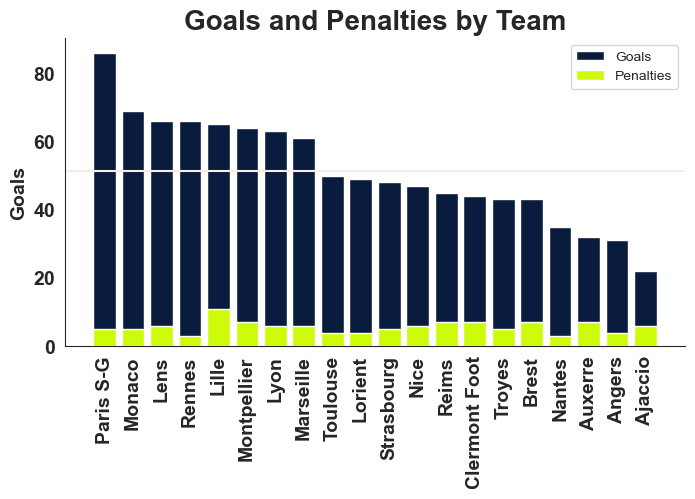

In [622]:
x=pk_by_team_df.Squad
y=pk_by_team_df.Gls
x2 = pk_by_team_df.penalties
promy=pk_by_team_df.Gls.mean()

fig,ax=plt.subplots(figsize=(8,4))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axhline(promy, color='#F9EBEA')

ax.bar(x, y, label='Goals', color='#091C3E')
ax.bar(x, x2, label='Penalties',color='#CDFB0A')

ax.set_ylabel('Goals', size=14,weight='bold')
ax.set_title('Goals and Penalties by Team', size= 20, weight='bold')
ax.legend()

ax.set_facecolor("#FFFFFF") #inbox color
fig.set_facecolor('#FFFFFF')#outbox color
plt.yticks(size=14, weight='bold')
plt.xticks(rotation=90, size=14, weight ='bold');

In [510]:
teams=ligue_df.groupby(by='Squad')['Gls','Ast'].sum()
teams=teams.reset_index()
average_age=ligue_df.groupby('Squad')['Age'].mean().astype(int)
merge=pd.merge(teams, average_age, on='Squad', how='outer')
teams=merge
teams=teams.reset_index()
teams.Squad=teams.Squad.str.lower()

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_4816\2848804501.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teams=ligue_df.groupby(by='Squad')['Gls','Ast'].sum()


In [511]:
os.getcwd()
os.chdir('C:/Users/Interventoria/Desktop/Daniel cursos/Data_Analyst/Python/Ligue 1/Teams')

In [512]:
teams['path'] =teams['Squad'] + '.png'

In [513]:
ligue_table = {
    'Squad': ['Ajaccio', 'Angers', 'Auxerre', 'Brest', 'Clermont Foot', 'Lens', 'Lille', 'Lorient',
              'Lyon', 'Marseille', 'Monaco', 'Montpellier', 'Nantes', 'Nice', 'Paris S-G', 'Reims',
              'Rennes', 'Strasbourg', 'Toulouse', 'Troyes'],
    'W': [7, 4, 8, 11, 17, 25, 19, 15, 18, 22, 19, 15, 7, 15, 27, 12, 21, 9, 13, 4],
    'D': [5, 6, 11, 11, 8, 9, 10, 10, 8, 7, 8, 5, 15, 13, 4, 15, 5, 13, 9, 12],
    'L': [26, 28, 19, 16, 13, 4, 9, 13, 12, 9, 11, 18, 16, 10, 7, 11, 12, 16, 16, 22],
    'GF': [23, 33, 35, 44, 45, 68, 65, 52, 65, 67, 70, 65, 37, 48, 89, 45, 69, 51, 51, 45],
    'GA': [74, 81, 63, 54, 49, 29, 44, 53, 47, 40, 58, 62, 55, 37, 40, 45, 39, 59, 57, 81],
    'GD': [-51, -48, -28, -10, -4, 39, 21, -1, 18, 27, 12, 3, -18, 11, 49, 0, 30, -8, -6, -36],
    'Pts': [26, 18, 35, 44, 59, 84, 67, 55, 62, 73, 65, 50, 36, 58, 85, 51, 68, 40, 48, 24],
    'Attendance': ['7,369', '9,630', '15,606', '12,667', '11,270', '37,652', '36,148', '14,992',
                   '46,058', '62,687', '7,095', '13,804', '30,002', '22,286', '46,334', '13,290',
                   '27,722', '25,278', '23,966', '10,004']}

ligue_table_df=pd.DataFrame(ligue_table)
ligue_table_df.set_index
ligue_table_df.Squad=ligue_table_df.Squad.str.lower()
mergue_ligue_values=pd.merge(ligue_table_df,teams , on='Squad', how='outer')
ligue_table_df=mergue_ligue_values
ligue_table_df.sort_values(by='Pts', ascending=False).head(3)

,Squad,W,D,L,GF,GA,GD,Pts,Attendance,index,Gls,Ast,Age,path
14,paris s-g,27,4,7,89,40,49,85,"46,334",14,86,62,24,paris s-g.png
5,lens,25,9,4,68,29,39,84,"37,652",5,66,49,25,lens.png
9,marseille,22,7,9,67,40,27,73,"62,687",9,61,38,25,marseille.png


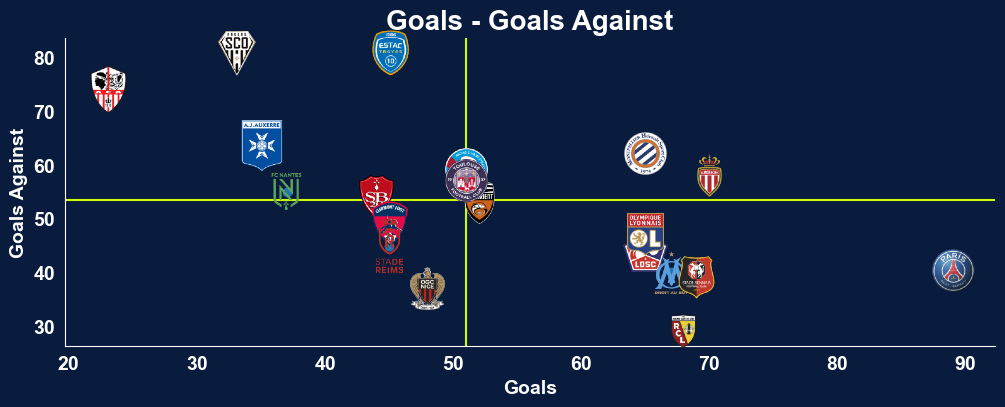

In [623]:
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=0.45, alpha=1)

sns.set_style('white')
x =ligue_table_df['GF']
y=ligue_table_df.GA

promx=ligue_table_df['GF'].median()
promy=ligue_table_df.GA.median()

fig, ax= plt.subplots(figsize=(12,4))

ax.scatter(ligue_table_df['GF'], ligue_table_df.GA)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.set_facecolor("#091C3E") #inbox color
fig.set_facecolor('#091C3E')#outbox color

#definimos labels
nombreejex='Goals'
nombreejey='Goals Against'
plt.xlabel(nombreejex,color='white', size=14, weight='bold')
plt.ylabel(nombreejey, color='white', size=14, weight='bold')
plt.yticks(color='white', size=14, weight='bold')
plt.xticks(color='white', size=14, weight='bold')


#definimos lineas de media
ax.axhline(promy,color='#CDFB0A')
ax.axvline(promx,color='#CDFB0A')

#titulo
plt.title(f'{nombreejex} - {nombreejey}', fontsize =20, color='white', weight='bold')

for index, row in ligue_table_df.iterrows():
    ab=AnnotationBbox(getImage(row['path']), (row['GF'], row['GA']), frameon=False)
    ax.add_artist(ab)
    
    


In [515]:
os.chdir('C:/Users/Interventoria/Desktop/Daniel cursos\Data_Analyst/Python/Ligue 1')

In [516]:
ps2=pd.read_csv('player_stats_2.csv', delimiter=';')

In [517]:
ligue_df2=pd.merge(ligue_df,ps2, on='Player', how='outer')
ligue_df2['Squad']=ligue_df2.Squad.str.lower()
ligue_table_df2=ligue_table_df[['Squad','path']]

In [518]:
players_df=pd.merge(ligue_df2,ligue_table_df2,
                    how='left', left_on='Squad',right_on ='Squad')
players_df['Pos'] = players_df.Pos.str.split(',').str[0]

players_df=players_df.drop('Gls_y',axis=1)
players_df=players_df.rename(columns={'Gls_x':'goals'})
players_df=players_df.drop('Starts',axis=1)
players_FW=players_df[(players_df.Pos=='FW') & (players_df.goals>8)]
players_FW.head(3)

,Player,Nation,Pos,Squad,Age,MP,Min,goals,Ast,PK,...,Mid 3rd,Att 3rd,dribble challenges,dribles challenged won,Lost,Blocks,Sh.1,Pass,Interceptions,path
0,Kylian Mbappé,FRA,FW,paris s-g,23,34,2818,29,5,3,...,5.0,5.0,5.0,16.0,11.0,5.0,0.0,5.0,5,paris s-g.png
1,Alexandre Lacazette,FRA,FW,lyon,31,35,2929,27,5,6,...,17.0,19.0,10.0,29.0,19.0,23.0,3.0,20.0,15,lyon.png
2,Jonathan David,CAN,FW,lille,22,37,3166,24,4,10,...,11.0,7.0,10.0,27.0,17.0,20.0,2.0,18.0,8,lille.png


In [519]:
os.getcwd()
os.listdir()
os.chdir('C:/Users/Interventoria/Desktop/Daniel cursos\Data_Analyst/Python/Ligue 1/Teams')

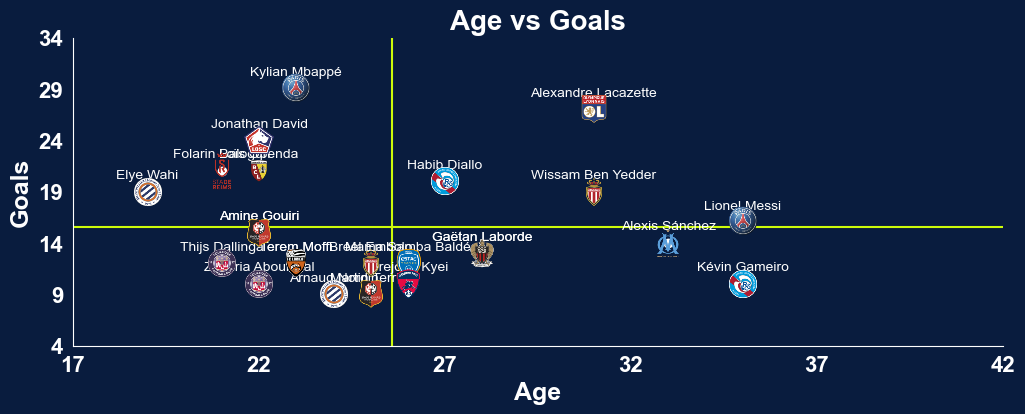

In [624]:
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=0.3, alpha=1)


x=players_FW.Age.astype(int)
y=players_FW.goals.astype(int)
promx=x.mean()
promy=y.mean()

fig, ax =plt.subplots(figsize=(12,4))

ax.scatter(x,y, color='white')

# Annotate each data point
for i, txt in enumerate(players_FW.Player):
    ax.annotate(txt, (x.iat[i]-0, y.iat[i]+1.3), ha='center', va='baseline', color='white')

for index, row in players_FW.iterrows():
    ab=AnnotationBbox(getImage(row['path']), (row['Age'], row['goals']), frameon=False)
    ax.add_artist(ab)

    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.set_facecolor("#091C3E") #inbox color
fig.set_facecolor('#091C3E')#outbox color

#definimos labels
nombreejex='Age'
nombreejey='Goals'
plt.xlabel(nombreejex,color='white', fontsize = 18, weight='bold' )
plt.ylabel(nombreejey, color='white', fontsize = 18, weight='bold')
plt.yticks(color='white')
plt.xticks(color='white')


#definimos lineas de media
ax.axhline(promy,color='#CDFB0A')
ax.axvline(promx,color='#CDFB0A');

#titulo
plt.title(f'{nombreejex} vs {nombreejey}', fontsize =20, color='white', weight='bold')

plt.yticks(range(min(y)-5, int(max(y)) +6, 5), color='white', fontsize=16, weight='bold')
plt.xticks(range(min(x)-2, max(x)+10, 5),color='white', fontsize=16, weight='bold');

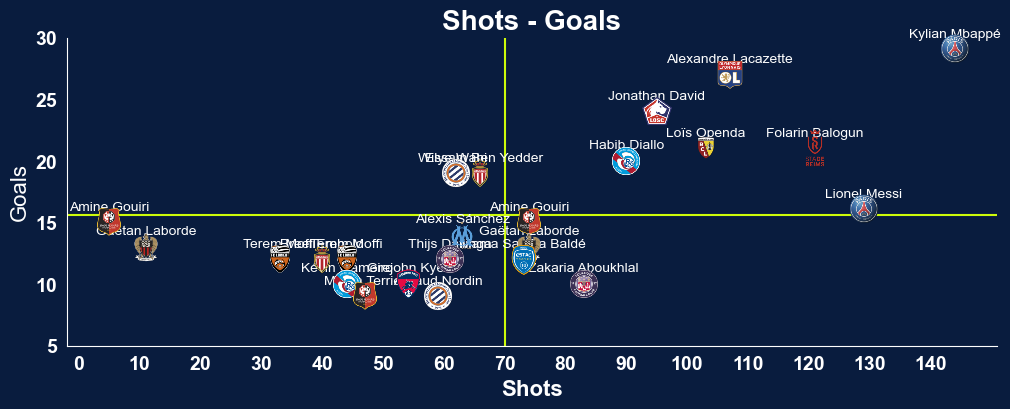

In [625]:
x=players_FW.Sh.astype(int)
y=players_FW.goals.astype(int)
promx=x.mean()
promy=y.mean()


fig, ax =plt.subplots(figsize=(12,4))

ax.scatter(x,y, color="#091C3E")

# Annotate each data point
for i, txt in enumerate(players_FW.Player):
   ax.annotate(txt, (x.iat[i]-0, y.iat[i]+1), ha='center', va='baseline', color='white')

for index, row in players_FW.iterrows():
    ab=AnnotationBbox(getImage(row['path']), (row['Sh'], row['goals']), frameon=False)
    ax.add_artist(ab)
    
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.set_facecolor("#091C3E") #inbox color
fig.set_facecolor('#091C3E')#outbox color

#definimos labels
nombreejex='Shots'
nombreejey='Goals'
plt.xlabel(nombreejex,color='white', fontsize=16, weight='bold')
plt.ylabel(nombreejey, color='white', fontsize=16)
plt.yticks(color='white')
plt.xticks(color='white')


#definimos lineas de media
ax.axhline(promy,color='#CDFB0A')
ax.axvline(promx,color='#CDFB0A');

#titulo
plt.title(f'{nombreejex} - {nombreejey}', fontsize =20, color='white',weight='bold')

plt.yticks(range(min(y)-4, int(max(y)) +5, 5), color='white', fontsize=14, weight='bold')
plt.xticks(range(min(x)-5, max(x)+6, 10),color='white', fontsize=14, weight='bold');

In [522]:
ligue_table_df2=ligue_table_df[['Squad','path']]
ligue_table_df2

,Squad,path
0,ajaccio,ajaccio.png
1,angers,angers.png
2,auxerre,auxerre.png
3,brest,brest.png
4,clermont foot,clermont foot.png
5,lens,lens.png
6,lille,lille.png
7,lorient,lorient.png
8,lyon,lyon.png
9,marseille,marseille.png


In [523]:
players_df.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Age', 'MP', 'Min', 'goals', 'Ast',
       'PK', 'GoalsPerMatch', 'Gls_and_Ast', 'Sh', 'SoT', 'Tkl', 'TklW',
       'Def 3rd', 'Mid 3rd', 'Att 3rd', 'dribble challenges',
       'dribles challenged won', 'Lost', 'Blocks', 'Sh.1', 'Pass',
       'Interceptions', 'path'],
      dtype='object')

In [524]:
players_df=pd.merge(ligue_df2,ligue_table_df2,
                    how='left', left_on='Squad',right_on ='Squad')
players_df['Pos'] = players_df.Pos.str.split(',').str[0]
players_df = players_df.drop('Gls_y', axis=1)
players_df = players_df.rename(columns= {'Gls_x':'goals'})

In [525]:
players_FW=players_df[(players_df.Pos=='FW') & (players_df.goals>8)]
players_FW.head(3)

,Player,Nation,Pos,Squad,Age,MP,Starts,Min,goals,Ast,...,Mid 3rd,Att 3rd,dribble challenges,dribles challenged won,Lost,Blocks,Sh.1,Pass,Interceptions,path
0,Kylian Mbappé,FRA,FW,paris s-g,23,34,32,2818,29,5,...,5.0,5.0,5.0,16.0,11.0,5.0,0.0,5.0,5,paris s-g.png
1,Alexandre Lacazette,FRA,FW,lyon,31,35,34,2929,27,5,...,17.0,19.0,10.0,29.0,19.0,23.0,3.0,20.0,15,lyon.png
2,Jonathan David,CAN,FW,lille,22,37,36,3166,24,4,...,11.0,7.0,10.0,27.0,17.0,20.0,2.0,18.0,8,lille.png


In [526]:
top_scorers= ligue_df.sort_values('Player')
top_scorers=top_scorers[ligue_df['Gls'] >=13]

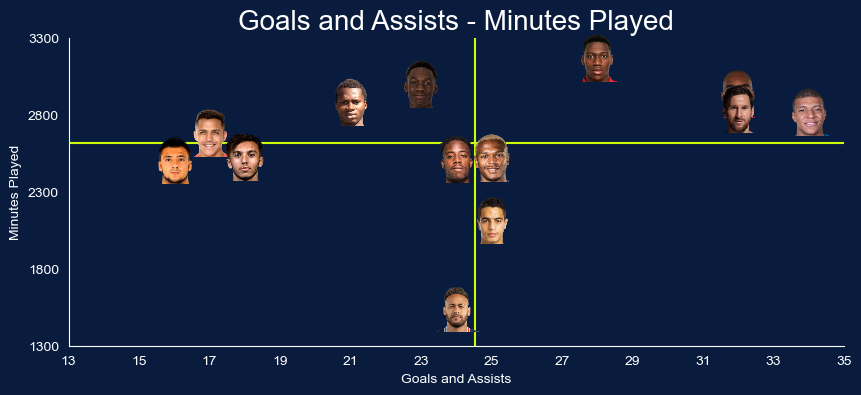

In [527]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox # to import imagessns.set_style('white')
x =top_scorers['Gls_and_Ast']
y=top_scorers.Min

promx=top_scorers['Gls_and_Ast'].mean()
promy=top_scorers.Min.mean()

fig, ax = plt.subplots(figsize =(10,4))

ax.scatter(x,y) # pasamos puntos

plt.yticks(range(min(top_scorers['Min'])-245, int(max(top_scorers['Min'])) + 550, 500), color='white')
plt.xticks(range(min(top_scorers['Gls_and_Ast'])-3, max(top_scorers['Gls_and_Ast'])+3, 2),color='white')
#set lines margin
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.set_facecolor("#091C3E") #inbox color
fig.set_facecolor('#091C3E')#outbox color

#definimos labels
nombreejex='Goals and Assists'
nombreejey='Minutes Played'
plt.xlabel(nombreejex,color='white')
plt.ylabel(nombreejey, color='white')

#definimos lineas de media
ax.axhline(promy,color='#CDFB0A')
ax.axvline(promx,color='#CDFB0A')

#titulo
plt.title(f'{nombreejex} - {nombreejey}', fontsize =20, color='white')

# set images

def getimage(path, zoom=0.17):
    return OffsetImage(plt.imread(path), zoom=zoom)
import os
files = os.listdir('C:/Users/Interventoria/Desktop/Daniel cursos/Data_Analyst/Python/Ligue 1/faces')

for x0, y0,file in zip(x,y,files):
    ab=AnnotationBbox(getimage(f'C:/Users/Interventoria/Desktop/Daniel cursos/Data_Analyst/Python/Ligue 1/faces/{file}'),
                     (x0,y0), frameon=False)
    ax.add_artist(ab)

In [528]:
from scipy import stats
from mplsoccer import PyPizza, add_image, FontManager
import math

In [529]:
ligue_dfposfx=ligue_df2
ligue_dfposfx.Pos=ligue_df2['Pos'].str.split(',', expand=True)[0]
ligue_dfposfx=ligue_dfposfx[(ligue_dfposfx['Pos'] =='FW') &(ligue_dfposfx.MP>16)]
ligue_dfposfx.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Age', 'MP', 'Starts', 'Min',
       'Gls_x', 'Ast', 'PK', 'GoalsPerMatch', 'Gls_and_Ast', 'Gls_y', 'Sh',
       'SoT', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd',
       'dribble challenges', 'dribles challenged won', 'Lost', 'Blocks',
       'Sh.1', 'Pass', 'Interceptions'],
      dtype='object')

In [530]:
ligue_dfposfx=ligue_dfposfx.drop(['Pos','Squad','Age','Nation','GoalsPerMatch', 'Gls_and_Ast','Tkl', 'TklW',
       'Def 3rd', 'Mid 3rd', 'Att 3rd', 'dribble challenges',
       'dribles challenged won', 'Lost', 'Blocks', 'Sh.1', 'Pass',
       'Interceptions'], axis=1)
ligue_dfposfx.reset_index
ligue_dfposfx

,Player,MP,Starts,Min,Gls_x,Ast,PK,Gls_y,Sh,SoT
0,Kylian Mbappé,34,32,2818,29,5,3,29,144,73
1,Alexandre Lacazette,35,34,2929,27,5,6,27,107,47
2,Jonathan David,37,36,3166,24,4,10,24,95,44
3,Folarin Balogun,37,34,2999,21,2,6,21,121,50
4,Loïs Openda,38,29,2517,21,4,1,21,103,49
...,...,...,...,...,...,...,...,...,...,...
220,Adam Ounas,21,12,1064,1,1,0,1,26,9
343,Veljko Birmančević,25,2,444,0,0,0,0,13,3
345,Badredine Bouanani,19,9,863,0,4,0,0,24,10
370,Arber Zeneli,23,12,1000,0,2,0,0,31,6


In [535]:
ligue_dfposfx=ligue_dfposfx.drop(columns='Gls_y', axis=1)
ligue_dfposfx=ligue_dfposfx.rename(columns={'Gls_x' : 'goals'})
params=list(ligue_dfposfx.columns)[3:]
ligue_dfposfx.loc[ligue_dfposfx['Player'] == 'Elye Wahi']
player_df11=ligue_dfposfx.loc[ligue_dfposfx['Player'] == 'Elye Wahi'].reset_index()


In [536]:
player_df11=list(player_df11.loc[0])
player_df11=player_df11[4:]
player_df11

[2513, 19, 5, 1, 62, 36]

In [537]:
print(len(params), len(player_df11))

6 6


In [538]:
#find values of percentile for the player and save them on a list
values=[]

for x in range(len(params)):
    values.append(math.floor(stats.percentileofscore(ligue_dfposfx[params[x]], player_df[x])))
values

[82, 91, 88, 79, 14, 98]

In [543]:
from urllib.request import urlopen
from PIL import Image
myImage = Image.open('C:/Users/Interventoria/Desktop/Daniel cursos/Data_Analyst/Python/Ligue 1/Pie charts/image 38.png');

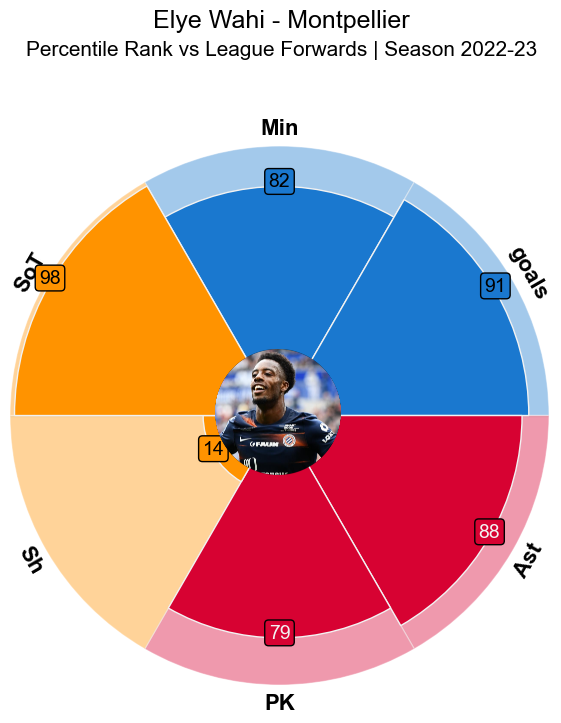

In [628]:
# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#FFFFFF",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

slice_colors = ["#1A78CF"] * 1 + ['#1A78CF'] *1 + ["#D70232"] * 1 + ['#D70232'] *1+ ["#FF9300"] * 1 + ['#FF9300'] *1
text_colors = ["#000000"] * 2 + ["#F2F2F2"] * 2 + ["#000000"] * 2

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(7, 7),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=16, weight= 'bold',
        va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=14,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)


# add title
fig.text(
    0.515, 1.05, "Elye Wahi - Montpellier", size=18,
    ha="center", color="#000000"
)

# add subtitle
fig.text(
    0.515, 1.01,
    "Percentile Rank vs League Forwards | Season 2022-23",
    size=15,
    ha="center", color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
#CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

#fig.text(
    #0.99, 0.005, f"{CREDIT_1}", size=9,
    #color="#000000",
    #ha="right"
#)

# add image
ax_image = add_image(
    myImage, fig, left=0.42, bottom=0.41, width=0.18, height=0.18
)   # these values might differ when you are plotting

plt.show()

In [548]:
player_Messi=ligue_dfposfx.loc[ligue_dfposfx['Player'] == 'Lionel Messi'].reset_index()
player_Messi=list(player_Messi.loc[0])
player_Messi=player_Messi[4:]
player_Messi

[2837, 16, 16, 0, 129, 55]

In [549]:
valuesmessi=[]

for x in range(len(params)):
    valuesmessi.append(math.floor(stats.percentileofscore(ligue_dfposfx[params[x]], player_Messi[x])))
valuesmessi

[93, 89, 100, 36, 98, 98]

In [550]:
countries = ligue_df['Nation'].value_counts().reset_index()
countries.columns = ['Nation', 'Count']
countries_not_france=countries[countries['Nation']!='FRA']
countries_not_france=countries_not_france.head(15)

In [551]:
myImage2 = Image.open('C:/Users/Interventoria/Desktop/Daniel cursos/Data_Analyst/Python/Ligue 1/Pie charts/image39.png');

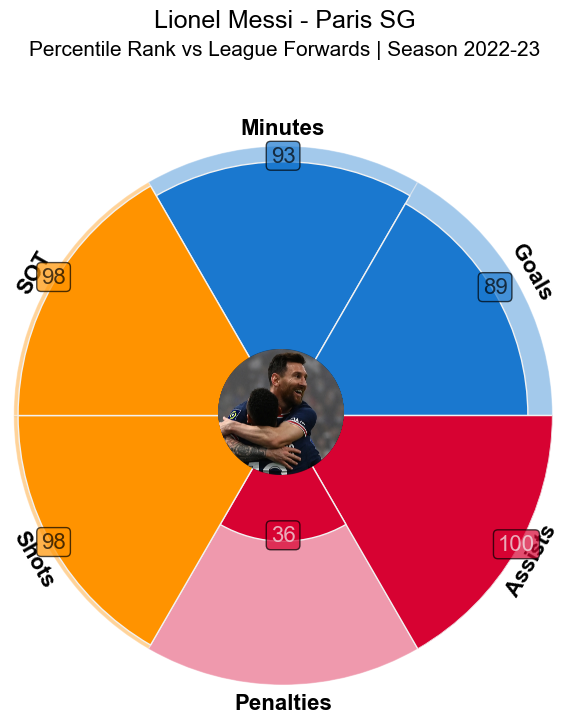

In [629]:
param_labels=['Minutes', 'Goals', 'Assists', 'Penalties', 'Shots', 'SOT']

# instantiate PyPizza class
baker = PyPizza(
    params=param_labels,            # list of parameters
    
    background_color="#FFFFFF",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20          # size of inner circle
)

slice_colors = ["#1A78CF"] * 1 + ['#1A78CF'] *1 + ["#D70232"] * 1 + ['#D70232'] *1+ ["#FF9300"] * 1 + ['#FF9300'] *1
text_colors = ["#000000"] * 2 + ["#F2F2F2"] * 2 + ["#000000"] * 2

# plot pizza
fig, ax = baker.make_pizza(
    valuesmessi,                          # list of values
    figsize=(7, 7),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=16,
        va="center", weight='bold', zorder=1,alpha=1, 
        
    ),                       
    kwargs_values=dict(
        color="#000000", fontsize=16, alpha=0.7,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1, alpha=0.7
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 1.05, "Lionel Messi - Paris SG", size=18,
    ha="center", color="#000000"
)

# add subtitle
fig.text(
    0.515, 1.01,
    "Percentile Rank vs League Forwards | Season 2022-23",
    size=15,
    ha="center", color="#000000"
)


# add image
ax_image = add_image(
    myImage2, fig, left=0.42, bottom=0.41, width=0.18, height=0.18
)   # these values might differ when you are plotting

plt.show()

In [633]:
player_neymar=ligue_dfposfx.loc[ligue_dfposfx['Player'] == 'Neymar'].reset_index()

ligue_dfposfx.loc[ligue_dfposfx['Player'] == 'Neymar']

,Player,MP,Starts,Min,goals,Ast,PK,Sh,SoT


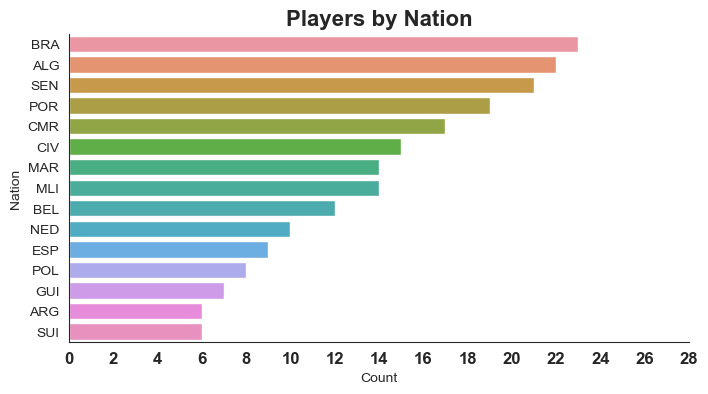

In [620]:
x=countries_not_france.Count
y=countries_not_france.Nation

fig,ax=plt.subplots(figsize=(8,4))

sns.barplot(x=x,y=y,)
plt.title('Players by Nation', size=16, weight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(range(0,30,2))
plt.xticks(weight='bold', size=12);

In [621]:
#players by age group
under_20 = ligue_df[ligue_df.Age <=20]
under_25 =ligue_df[(ligue_df.Age > 20) & (ligue_df.Age <=25)]
under_30 = ligue_df[(ligue_df.Age >25) & (ligue_df.Age <=30)]
over_30 = ligue_df[ligue_df.Age>30]

under_20=under_20.Player.count().astype(int)
under_25=under_25.Player.count().astype(int)
under_30=under_30.Player.count().astype(int)
over_30=over_30.Player.count().astype(int)

#create data frame
data = {'Range': ['Under 20', '20-25', '26-30', 'Over 30'],
        'No. players': [under_20, under_25, under_30, over_30]}

# Create the DataFrame
range_age = pd.DataFrame(data)
range_age

,Range,No. players
0,Under 20,137
1,20-25,233
2,26-30,166
3,Over 30,70


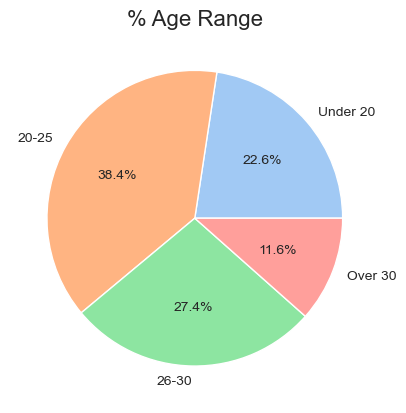

In [603]:
plt.pie(x=range_age['No. players'], labels=range_age.Range, autopct="%.1f%%",colors=sns.color_palette('pastel'))
plt.title('% Age Range',size=16);

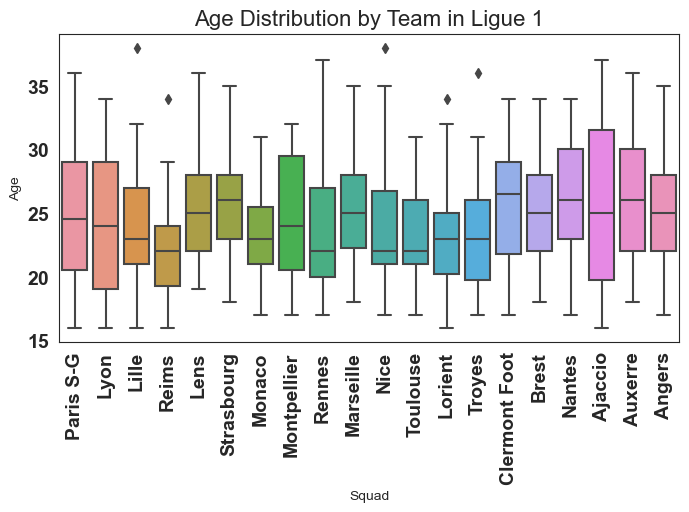

In [618]:
# Average age players in each club

plt.figure(figsize=(8,4))
sns.boxplot(x='Squad', y = 'Age', data= ligue_df)
plt.xticks(rotation=90);
plt.title("Age Distribution by Team in Ligue 1", size=16)
plt.xticks(weight='bold', size=14)
plt.yticks(weight='bold',size=14);